# Code for plots

In [33]:
import pandas as pd
df = pd.read_csv('GoMore_Data_DK_variables.csv', sep=',', low_memory=False)

In [34]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline

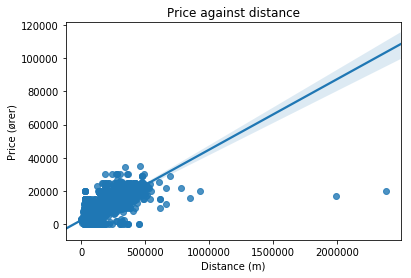

In [15]:
#scatterplot - pris mod distance
fig1 = sns.regplot(x=df['distance'], y=df['price'], scatter=True, fit_reg=True, order=1)
plt.xlabel('Distance (m)')
plt.ylabel('Price (ører)')
plt.title('Price against distance')
plt.show()
fig = fig1.get_figure()
fig.savefig("scatterplot_outliers.png")

In [16]:
outlier = df['distance'] > 1500000
print(df[outlier]['name_dep'])
print(df[outlier]['name_arr'])

#drop outliers
df = df.drop(df[outlier == True].index)

3980       Skibby
4322    København
Name: name_dep, dtype: object
3980    Skanderborg Fælled
4322                Aarhus
Name: name_arr, dtype: object


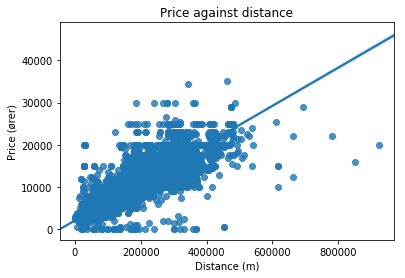

In [17]:
#scatterplot uden outliers
fig_no_outlier = sns.regplot(x=df['distance'], y=df['price'], scatter=True, fit_reg=True, order=1)
plt.xlabel('Distance (m)')
plt.ylabel('Price (ører)')
plt.title('Price against distance')
plt.show()
fig = fig_no_outlier.get_figure()
fig.savefig("scatterplot_no_outliers.png")

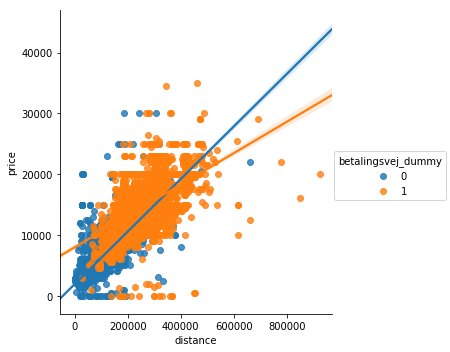

In [6]:
#scatterplot opdelt på betalingsvej
g = sns.lmplot(x='distance', y='price', hue='betalingsvej_dummy', data=df)
plt.savefig('scatterplot_betalingsvej.png')

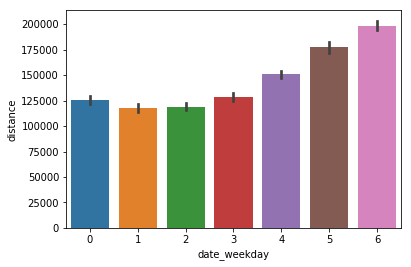

In [9]:
#Distance på ugedag
sns.barplot(x='date_weekday', y='distance', data=df)
plt.savefig('distance_weekday.png')

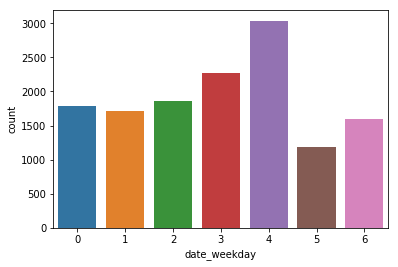

In [10]:
#Antal rides per ugedag
sns.countplot(x = 'date_weekday', data = df)
plt.savefig('rides_per_weekday.png')

In [35]:
import pandas as pd
import geopandas as gp #conda install geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [36]:
#geopandas

#make sample
#sample = df.sample(frac=0.01)
#len(sample)
sample = df #her bruger vi hele datasættet

In [37]:
sample['Coordinates'] = list(zip(sample.longitude_dep, sample.latitude_dep))
sample['Coordinates'] = sample['Coordinates'].apply(Point)
gdf = gp.GeoDataFrame(sample, geometry='Coordinates')
gdf.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,name_dep,time,date,date_weekday,Denmark,SJ_dep,SJ_arr,betalingsvej,betalingsvej_dummy,Coordinates
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,Rødovre,15:30:00,2018-08-07,1,True,True,False,1,1,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,Randers,14:00:00,2018-08-07,1,True,False,True,1,1,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,Enghavevej 168,08:30:00,2018-08-09,3,True,True,False,1,1,POINT (12.5381179 55.65733299999999)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,Struer,06:45:00,2018-08-07,1,True,False,False,0,0,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,Olof Palmes Allé,16:15:00,2018-08-10,4,True,False,False,0,0,POINT (10.1848928 56.188259)


In [39]:
shp = gp.GeoDataFrame.from_file('/Users/bruger/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op

In [40]:
shp.crs = {'init': 'epsg:4326'} #kod til samme form for koordinater
gdf.crs = {'init': 'epsg:4326'}

dk_rides = gp.tools.sjoin(gdf, shp, how="right", op='intersects')

In [41]:
#Getting number of rides per municipality
rides_per_district = dk_rides.groupby("NAME_2").size()
rides_per_district = rides_per_district.to_frame(name="ride_num").reset_index()

ride_num = pd.merge(shp, rides_per_district, on="NAME_2", how="right")
ride_num

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,ride_num
0,64,DNK,Denmark,1,Hovedstaden,1,Albertslund,Kommune,Municipality,None,None,"POLYGON ((12.37129497528082 55.66018676757812,...",102
1,64,DNK,Denmark,1,Hovedstaden,2,Allerød,Kommune,Municipality,None,None,"POLYGON ((12.20744419097906 55.82781982421875,...",4
2,64,DNK,Denmark,1,Hovedstaden,3,Ballerup,Kommune,Municipality,None,None,"POLYGON ((12.42482471466076 55.70867538452143,...",41
3,64,DNK,Denmark,1,Hovedstaden,4,Bornholm,Kommune,Municipality,None,None,"POLYGON ((14.8880548477174 55.03041839599615, ...",1
4,64,DNK,Denmark,1,Hovedstaden,5,Brøndby,Kommune,Municipality,None,None,(POLYGON ((12.45293235778803 55.66483688354492...,44
5,64,DNK,Denmark,1,Hovedstaden,6,Christiansø,Kommune,Municipality,None,None,(POLYGON ((15.17916679382324 55.32513809204102...,1
6,64,DNK,Denmark,1,Hovedstaden,7,Dragør,Kommune,Municipality,None,None,"POLYGON ((12.66972160339361 55.6048583984375, ...",2
7,64,DNK,Denmark,1,Hovedstaden,8,Egedal,Kommune,Municipality,None,None,"POLYGON ((12.25075054168707 55.70841217041016,...",9
8,64,DNK,Denmark,1,Hovedstaden,9,Fredensborg,Kommune,Municipality,None,None,"POLYGON ((12.37311553955078 55.899169921875, 1...",33
9,64,DNK,Denmark,1,Hovedstaden,10,Frederiksberg,Kommune,Municipality,None,None,"POLYGON ((12.53828048706066 55.6976432800293, ...",148


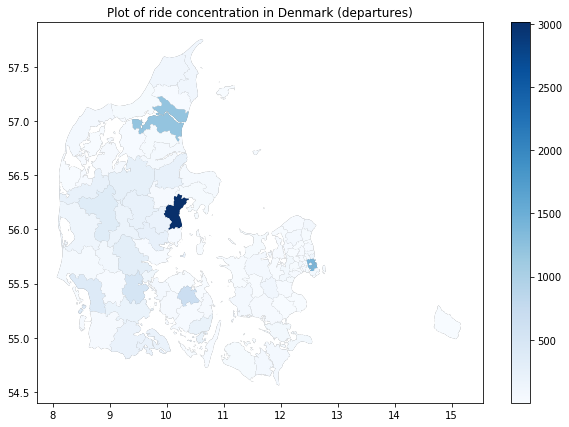

In [30]:
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
lima_bank_num.plot(ax=base, column='ride_num', cmap='Blues', alpha=1, legend=True)
ax.set_title("Ride concentration in Denmark (departures)")
leg = ax.get_legend()
fig.saveplot('geoplot_departures')

In [20]:
#ide til videre geoplot: beting på antal indbyggere i kommunerne - se hvem der har bedst mulighed for at bruge Gomore